In [ ]:
#To install transformers - https://huggingface.co/models
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 8.6 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 6.6 MB 48.4 MB/s 
     |████████████████████████████████| 596 kB 64.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#To install pyTorch
!pip3 install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [ ]:
!pip install rouge-score
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi

Sun Jun 19 17:33:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import statements

from transformers import LEDForConditionalGeneration, LEDTokenizer
import torch
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import re
from rouge import Rouge 
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Globals

sample_results = {}

In [ ]:
def get_summarization_and_scores(data,highlight):
  data = data.split('\n')
  for entry in data:
    if len(entry) == 0:
      data.remove(entry)
  input_text = process_data(data,name_required = False)
  summarized_text = get_summary(input_text)
  scores = get_rouge_score(highlight,summarized_text[0])
  return {"summarized_text" : summarized_text, "scores" : scores, "compression_ind" : [len(input_text),len(summarized_text)]}

In [ ]:
def process_data(data,name_required = False):
  res = []
  if not name_required:
    for entry in data:
      pos = entry.find(':')
      res.append(entry[pos+1:])
      data = res
  return '.'.join(data)

In [ ]:
def get_summary(input_data):

  tokenizer = LEDTokenizer.from_pretrained("allenai/led-large-16384-arxiv")
  input_ids = tokenizer(input_data, return_tensors="pt").input_ids.to("cuda")
  global_attention_mask = torch.zeros_like(input_ids)
  global_attention_mask[:, 0] = 1
  model = LEDForConditionalGeneration.from_pretrained("allenai/led-large-16384-arxiv", return_dict_in_generate=True).to("cuda")
  sequences = model.generate(input_ids, global_attention_mask=global_attention_mask).sequences
  summary = tokenizer.batch_decode(sequences)
  mod_summary = summary[0][:summary[0].find('#')]
  return mod_summary

In [ ]:
def get_rouge_score(input_text, summarized_text):
  rouge = Rouge()
  scores = rouge.get_scores(input_text, summarized_text)
  return scores

In [ ]:
def add_result_pair(data, human_summary, LEDSummary):
    sample_results[str({len(data)//len(human_summary):len(data)//len(LEDSummary)})] = {"human_summary":human_summary,"LEDSummary":LEDSummary}

In [ ]:
def get_wordcloud(wordcloud):
  comment_words = ''
  stopwords = set(STOPWORDS)
  plt.figure(figsize=(40, 30))
  # Display image
  plt.imshow(wordcloud) 
  # No axis details
  plt.axis("off");

In [ ]:
# Data to be summarized

data = """ Be bold! Think big! Barack Obama wants to do just that. An $800 billion economic stimulus plan. Three million jobs. Health care reform.
 A restructured automobile industry.
Obama's popularity with voters will win him influence with political opponents.
Obama won the biggest Democratic majority for president in 44 years. His party made big gains in Congress. 
Democrats now have a majority of nearly 60 percent in both the House and Senate. President Obama's got a mandate. And a majority. What's to stop him?
Just this: the U.S. system of government. It is set up to make it difficult to get things done.
The Constitution was written 222 years ago by men who didn't trust government. 
They had just waged a revolution against a king. To the founders of the American republic, strong government meant despotism.
So they set up a system with an elaborate separation of powers. The idea was to ensure weak government.
The dirty little secret of American government is that it was designed not to work very well.
As president after president has discovered, there are innumerable ways opponents can stop measures from getting passed, 
even if the president's party holds a majority in Congress.
The Senate has its own rule that's not in the Constitution requiring a super-majority of 60 Senate votes to control the agenda.
A minority of 41 senators can "filibuster'' a measure and prevent it from coming up for a vote. How many votes will Republicans have in the Senate? 
41 or 42, depending on the outcome in Minnesota where ballots are still being counted.
Presidents often have problems holding their own party together. 
That's because members of Congress are elected by local constituencies and they are expected to represent local interests.
American politicians are independent political entrepreneurs. They are not foot-soldiers of a party.
When Bill Clinton first became president, he had a solid Democratic majority in Congress. But he could not get his health care reform plan passed.
After an intense advertising campaign by opponents, many Americans were worried that the Clintons were planning a government takeover of the health care system. 
The Clinton plan failed, and within two years, Democrats lost their majority in Congress.
One-party control didn't work any better for George W. Bush. 
Bush had trouble getting what he wanted -- notably, immigration reform -- from a Republican Congress. Republicans lost their majority in Congress in 2006.
But here's another dirty little secret of American government: it often does work. Very well in fact.
Under the right conditions, barriers fall away and things get done, sometimes with amazing speed and efficiency.
What are the right conditions? An overwhelming sense of public urgency. That sense of urgency certainly existed after 9/11, when Congress quickly passed the Patriot Act.
Getting anything big done in American government requires a sense of crisis. 
That's why politicians in the U.S. are always declaring crises -- a drug crisis, an education crisis, an environmental crisis. 
Or they're trying to rally the country to fight a war on something -- a war on poverty, a war on crime.
If the public urgency is not authentic, however, opponents won't have much trouble stopping things from happening.
Obama certainly takes office at a time of crisis, just as Abraham Lincoln and Franklin D. Roosevelt did.
Like them, he has the opportunity to transform American government. Members of Congress who try to block President Obama's program may find themselves in political trouble.
Because there is yet another dirty little secret of American government: the United States is the most populist democracy in the world.
Here, the people rule.
When the people want something, they will get it, whether it's the death penalty or gun rights or lower taxes.
Why doesn't the United States have a metric system or dollar coins like other countries? Because the people won't use them.
Obama's popularity is soaring right now. When a president is popular, he has clout.
Everyone wants to be on his side, even members of the opposition party. They're in business for themselves, and supporting a popular president is good for business. 
Standing in his way could drive them out of business.
American government is not an efficient, well-oiled machine. It was never designed to be. It has to be lubricated by public pressure.
If the people are shouting "Do something!'' -- as they are right now -- then something will happen. Even if it means a lot more spending and a lot more government.S
The people reserve one key right: they will let the government know, rather quickly, whether or not it's working.
"""

In [ ]:
highlight = """@highlight

Three secrets behind the way U.S. government works

@highlight

It was designed to ensure weak government

@highlight

In times of crisis usual barriers fall away

@highlight

If voters want something done, it will get done somehow"""

highlight = highlight.replace('\n','')
highlight = highlight.split("@highlight")
highlight = '.'.join(highlight)

In [ ]:
# Driver code
res = get_summarization_and_scores(data,highlight)
res
add_result_pair(data,highlight,res["summarized_text"])

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

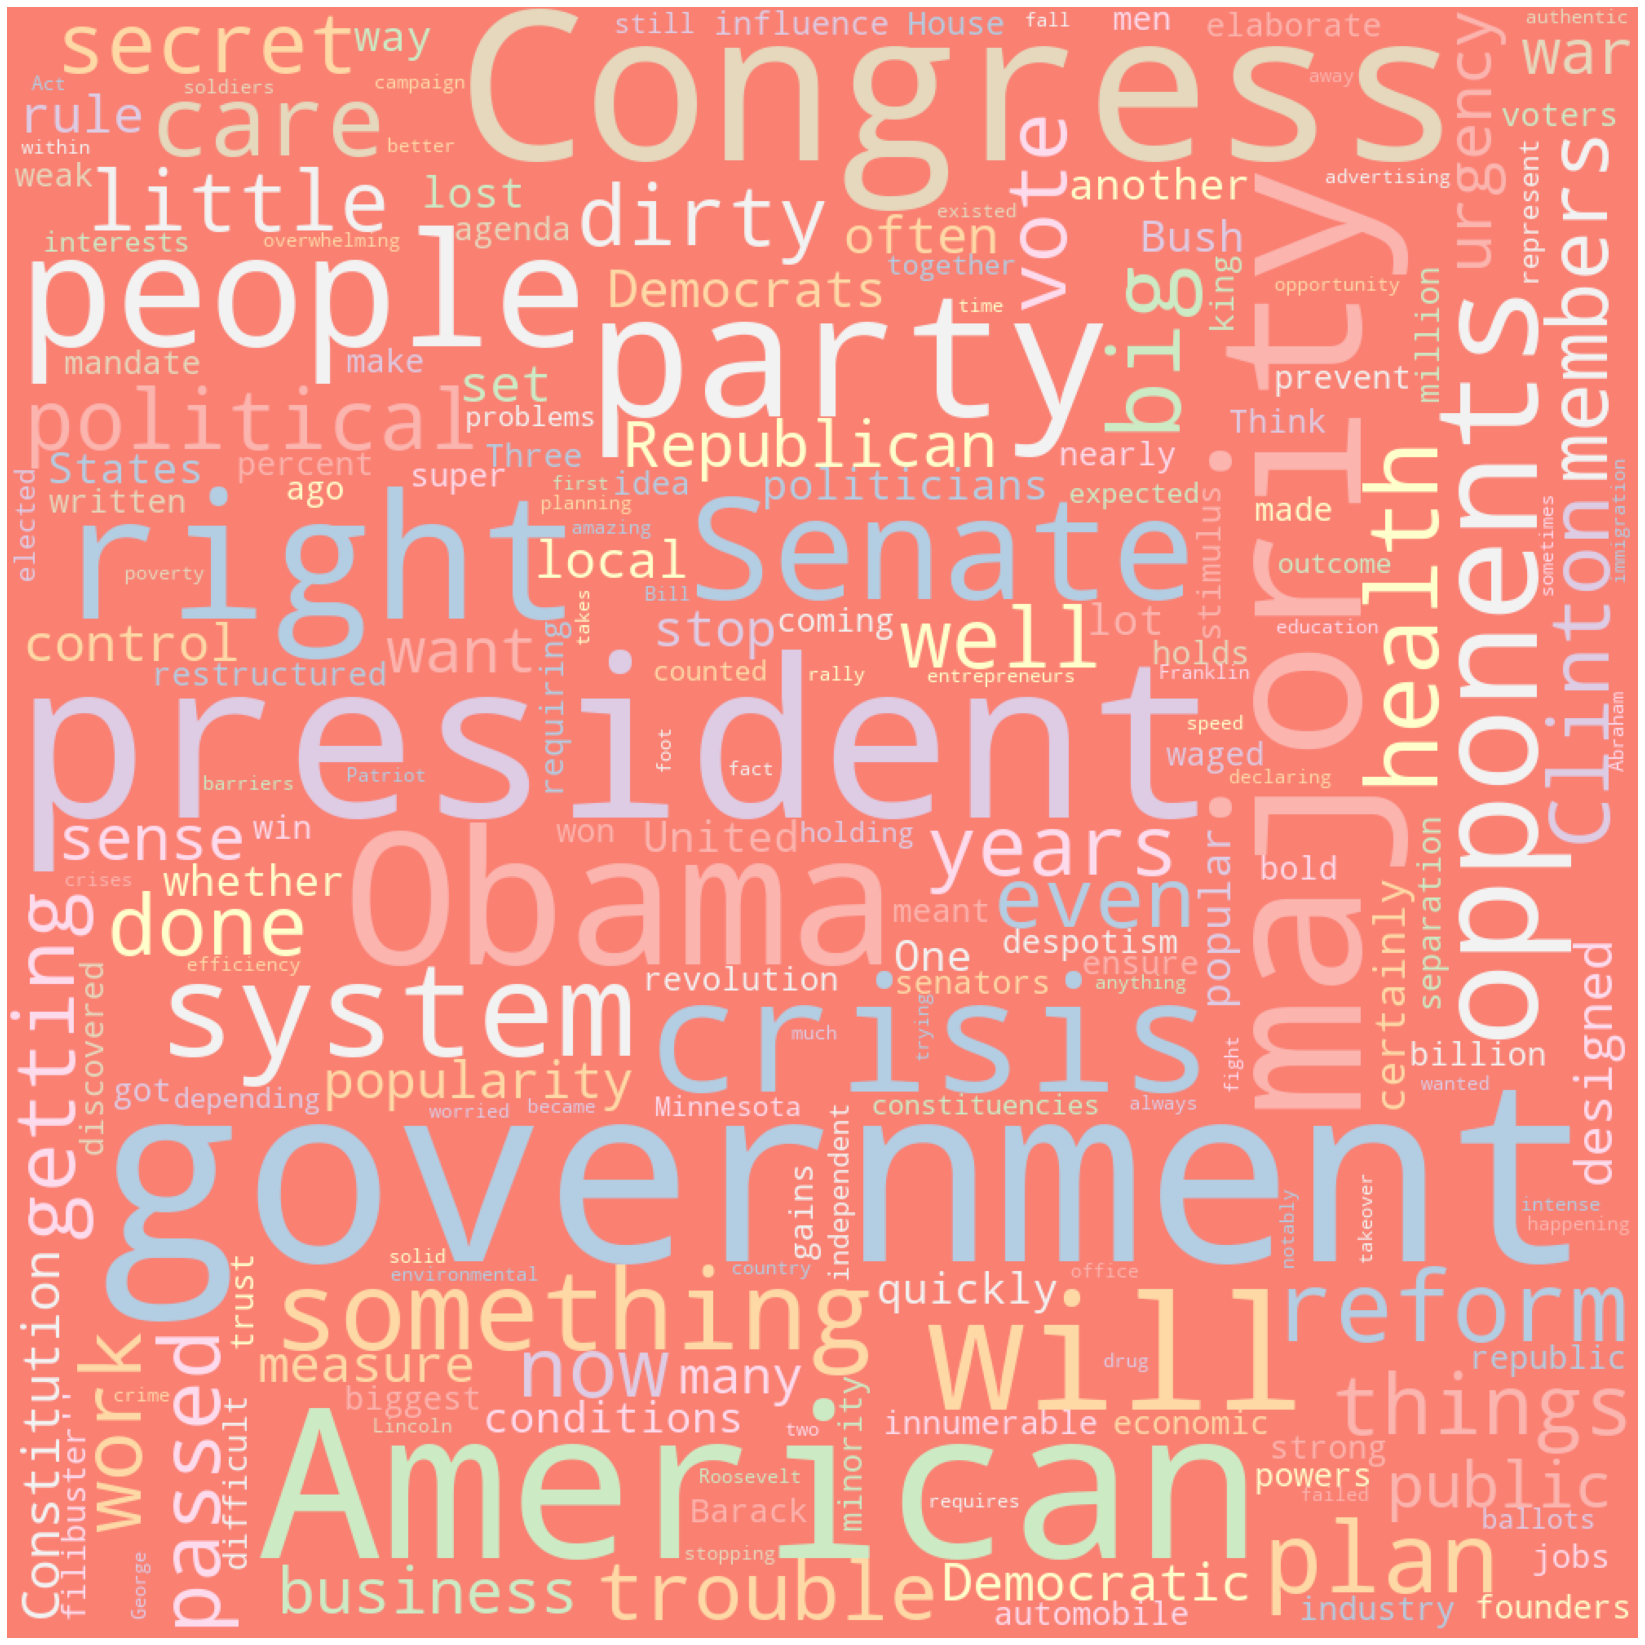

In [ ]:
text = process_data(data)
text = re.sub(r'==.*?==+', '', data)
text = text.replace('\n', '')
wordcloud = WordCloud(width= 1000, height = 1000, random_state=1, background_color='salmon',
                      colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
get_wordcloud(wordcloud)

In [ ]:
sample_results

{'{24: 2}': {'LEDSummary': '</s> the dirty little secret of American government is that it was designed not to work very well. as president after president has discovered, there are innumerable ways opponents can stop measures from getting passed, even if the president s party holds a majority in Congress. \n the Senate has its own rule that\'s not in the Constitution requiring a super-majority of 60 Senate votes to control the agenda. \n a minority of 41 senators can "filibuster\'\' a measure and prevent it from coming up for a vote. Republicans lost their majority in Congress in 2006. \n it often does work. Very well in fact. under the right conditions, barriers fall away and things get done, sometimes with amazing speed and efficiency. \n what are the right conditions? \n an overwhelming sense of public urgency. \n that sense of urgency certainly existed after 9/11, when Congress quickly passed the Patriot Act. \n getting anything big done in American government requires a sense of 

In [ ]:
sample_results['{24: 2}']["human_summary"]

'.Three secrets behind the way U.S. government works.It was designed to ensure weak government.In times of crisis usual barriers fall away.If voters want something done, it will get done somehow'

In [ ]:
sample_results['{24: 2}']["LEDSummary"]

'</s> the dirty little secret of American government is that it was designed not to work very well. as president after president has discovered, there are innumerable ways opponents can stop measures from getting passed, even if the president s party holds a majority in Congress. \n the Senate has its own rule that\'s not in the Constitution requiring a super-majority of 60 Senate votes to control the agenda. \n a minority of 41 senators can "filibuster\'\' a measure and prevent it from coming up for a vote. Republicans lost their majority in Congress in 2006. \n it often does work. Very well in fact. under the right conditions, barriers fall away and things get done, sometimes with amazing speed and efficiency. \n what are the right conditions? \n an overwhelming sense of public urgency. \n that sense of urgency certainly existed after 9/11, when Congress quickly passed the Patriot Act. \n getting anything big done in American government requires a sense of crisis. That\'s why politic